In [1]:
import numpy as np

from zdm import loading
from zdm import parameters
from astropy.cosmology import Planck18
from zdm import misc_functions as mf

from zdm import iteration as iteration

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [8,6]

/fred/oz002/jhoffmann/FRB_library/zdm/.venv/lib64/python3.9/site-packages/FRB-0.1.dev0-py3.9.egg/frb/halos/hmf.py:51: UserWarning: hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..
  warnings.warn("hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..")


In [2]:
# files = ["MC_CRAFT_ICS_1300_e5"]
# files = ["DSA", "FAST", "CRAFT_class_I_and_II", "CRAFT_ICS_892", "CRAFT_ICS_1300", "CRAFT_ICS_1632", "parkes_mb_class_I_and_II"]
files = ['CHIME/CHIME_decbin_0_of_6', 'CHIME/CHIME_decbin_1_of_6', 'CHIME/CHIME_decbin_2_of_6', 'CHIME/CHIME_decbin_3_of_6', 'CHIME/CHIME_decbin_4_of_6', 'CHIME/CHIME_decbin_5_of_6']

state = parameters.State()
state.set_astropy_cosmo(Planck18)

param_dict={'sfr_n': 1.13, 'alpha': 1.5, 'lmean': 2.27, 'lsigma': 0.55, 
            'lEmax': 41.26, 'lEmin': 39.5, 'gamma': -0.95, 'H0': 73,
            'min_lat': 0.0,  'sigmaDMG': 0.0, 'sigmaHalo': 20.0}

# param_dict={'lmean': 2.202843257641779, 'lsigma': 0.9619335753381064, 'lEmax': 41.79956400654363, 'lEmin': 38.092050976483094, 'gamma': -0.657306163796239, 'DMhalo': 2.0807181924361515, 'H0': 67.6509433959714, 'min_lat': None}
# param_dict={'sfr_n': 0.8808527057055584, 'alpha': 0.7895161131856694, 'lmean': 2.1198711983468064, 'lsigma': 0.44944780033763343, 
#             'lEmax': 41.18671139482926, 'lEmin': 39.81049090314043, 'gamma': -1.1558450520609953, 'H0': 54.6887137195215, #"halo_method": 0, 
#             "sigmaDMG": 0.5, "sigmaHalo": 15.0}
state.update_params(param_dict)

ss,gs = loading.surveys_and_grids(survey_names=files, init_state=state, rand_DMG=False, repeaters=True)

Loading survey: CHIME/CHIME_decbin_0_of_6
Loading survey: CHIME/CHIME_decbin_0_of_6 from CHIME/CHIME_decbin_0_of_6.ecsv
4
Loaded FRB info
FRB survey sucessfully initialised with  4  FRBs starting from 0
Loading survey: CHIME/CHIME_decbin_1_of_6
Loading survey: CHIME/CHIME_decbin_1_of_6 from CHIME/CHIME_decbin_1_of_6.ecsv
23
Loaded FRB info
FRB survey sucessfully initialised with  23  FRBs starting from 0
Loading survey: CHIME/CHIME_decbin_2_of_6
Loading survey: CHIME/CHIME_decbin_2_of_6 from CHIME/CHIME_decbin_2_of_6.ecsv
154
Loaded FRB info
FRB survey sucessfully initialised with  154  FRBs starting from 0
Loading survey: CHIME/CHIME_decbin_3_of_6
Loading survey: CHIME/CHIME_decbin_3_of_6 from CHIME/CHIME_decbin_3_of_6.ecsv
234
Loaded FRB info
FRB survey sucessfully initialised with  234  FRBs starting from 0
Loading survey: CHIME/CHIME_decbin_4_of_6
Loading survey: CHIME/CHIME_decbin_4_of_6 from CHIME/CHIME_decbin_4_of_6.ecsv
50
Loaded FRB info
FRB survey sucessfully initialised with

In [8]:
# s = ss[0]
# g = gs[0]

for s,g in zip(ss,gs):
    print(s.name)
    iteration.get_log_likelihood(g,s)

CHIME/CHIME_decbin_0_of_6
CHIME/CHIME_decbin_0_of_6 repeaters: [0.0, -10000000000.0, 0.0]
CHIME/CHIME_decbin_0_of_6 singles: [-10.243134364908784, -10000000000.0, -4.976679234753631]
CHIME/CHIME_decbin_1_of_6
CHIME/CHIME_decbin_1_of_6 repeaters: [0.0, -10000000000.0, 0.0]
CHIME/CHIME_decbin_1_of_6 singles: [-59.82688379651225, -10000000000.0, -38.1440231853789]
CHIME/CHIME_decbin_2_of_6
CHIME/CHIME_decbin_2_of_6 repeaters: [-7.928083310266921, -10000000000.0, -0.8407489031745424]
CHIME/CHIME_decbin_2_of_6 singles: [-416.24537963492276, -10000000000.0, -337.2043405619703]
CHIME/CHIME_decbin_3_of_6
CHIME/CHIME_decbin_3_of_6 repeaters: [-31.06625200179542, -10000000000.0, -6.072572549248694]
CHIME/CHIME_decbin_3_of_6 singles: [-624.0852888593486, -10000000000.0, -457.9775992739873]
CHIME/CHIME_decbin_4_of_6
CHIME/CHIME_decbin_4_of_6 repeaters: [-2.4073900928648406, -10000000000.0, 0.9929695004649325]
CHIME/CHIME_decbin_4_of_6 singles: [-131.88711470374426, -10000000000.0, -32.366394791318

In [4]:
from zdm import MCMC2
import os
from pkg_resources import resource_filename
import json

In [5]:
# Select from dictionary all variable parameters
with open(os.path.join(resource_filename('zdm', 'data'), "MCMC/params.json")) as f:
    mcmc_dict = json.load(f)

params = {k: mcmc_dict[k] for k in mcmc_dict['mcmc']['parameter_order']}

# param_dict={'sfr_n': 1.13, 'alpha': 1.5, 'lmean': 2.27, 'lsigma': 0.55, 
#             'lEmax': 41.26, 'lEmin': 39.5, 'gamma': -0.95, 'H0': 73,
#             'min_lat': 30.0,  'sigmaDMG': 0.0, 'sigmaHalo': 20.0}
# Set all values to random point in prior
param_dict = {}
for key,val in params.items():
    param_dict[key] = np.random.rand() * (val['max'] - val['min']) + val['min']

param_vals = []     
for key,val in param_dict.items():
    param_vals.append(val)

grid_params = {}
grid_params['dmmax'] = 7000.0
grid_params['ndm'] = 1400
grid_params['nz'] = 500

# print(ss)
ll = MCMC2.calc_log_posterior(param_vals, state, params, [ss, []], grid_params) 
# print(ll)

['20181118A' '20190104B' '20190515D' '20190605C']
[526.17689468 480.57689468 378.57689468 150.07689468]
[1.0 1.0 1.0 1.0]


/fred/oz002/jhoffmann/FRB_library/zdm/zdm/misc_functions.py:2705: RuntimeWarning: divide by zero encountered in log10
  zDMgrid = np.log10(zDMgrid)


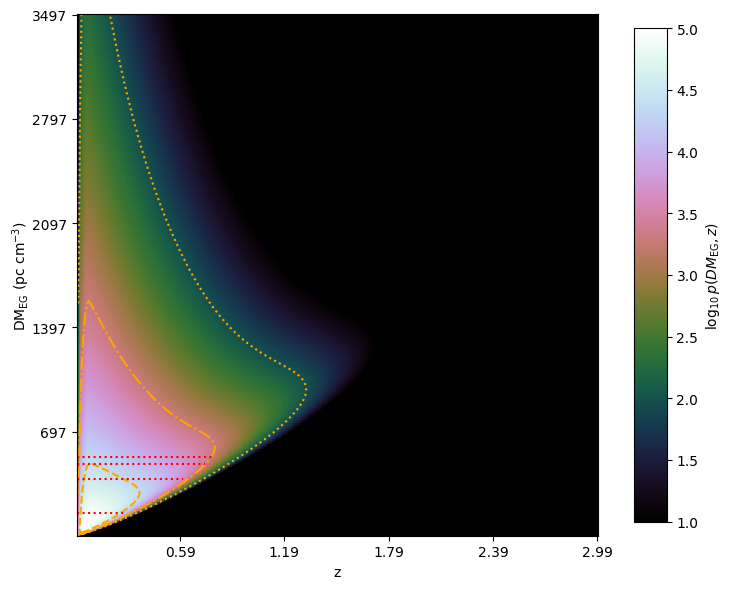

In [6]:
if s.zlist is None:
    Zs = None
    DMs = None
else:
    Zs = s.Zs[s.zlist]
    DMs = s.DMEGs[s.zlist]

if s.nozlist is not None:
    DMlines = s.DMEGs[s.nozlist]
else:
    DMlines = None

print(s.frbs["TNS"].values[s.Zs<0])
print(s.DMEGs[s.Zs<0])
print(s.Gbs[s.Zs<0])

mf.plot_grid_2(
    zDMgrid=g.rates,
    zvals=g.zvals,
    dmvals=g.dmvals,
    zmax=3.0,
    DMmax=3500,
    norm=0,
    log=True,
    project=False,
    Aconts=[0.01,0.1,0.5],
    showplot=True,
    save=False,
    name=files[0] + ".pdf",
    DMlines=DMlines,
    DMlims=[s.max_dm],
    FRBZ=Zs,
    FRBDM=DMs,
    data_clr='r',
    data_clr2='tab:blue'
)

In [7]:
xedges = np.append(g.zvals[::10], g.zvals[-1])
yedges = np.append(g.dmvals[::10], g.dmvals[-1])
heatmap, xedges, yedges = np.histogram2d(Zs, DMs, bins=(xedges, yedges))
dz = g.zvals[1] - g.zvals[0]
ddm = g.dmvals[1] - g.dmvals[0]

heatmap = heatmap / np.sum(heatmap) / dz / ddm
rates = np.zeros([int(len(g.zvals)/10), int(len(g.dmvals)/10)])

for i in range(g.rates.shape[0]):
    for j in range(g.rates.shape[1]):
        rates[i//10,j//10] += g.rates[i,j]

rates = rates / np.sum(rates) / dz / ddm
print(np.sum(np.abs(heatmap - rates)))

mf.plot_grid_2(
    zDMgrid= heatmap,
    zvals=g.zvals[5::10],
    dmvals=g.dmvals[5::10],
    zmax=2.5,
    DMmax=3500,
    norm=0,
    log=True,
    project=False,
    showplot=True,
    save=False,
    name=files[0] + ".pdf",
    DMlims=[s.max_dm],
    data_clr='r',
    data_clr2='tab:blue'
)

TypeError: object of type 'NoneType' has no len()

In [ ]:
pdm = np.sum(g.rates, axis=0)
pz = np.sum(g.rates, axis=1)

fig, axs = plt.subplots(2,1)
dm_hist = axs[0].hist(s.DMEGs, bins=200)
axs[0].plot(g.dmvals, pdm / np.max(pdm) * np.max(dm_hist[0]))
axs[0].set_xlim(left=0, right=2000)

z_hist = axs[1].hist(s.Zs[s.Zs > 0], bins=200)
axs[1].plot(g.zvals, pz / np.max(pz) * np.max(z_hist[0]))
axs[1].set_xlim(left=0, right=2)

In [ ]:
# s.Gbs = s.Gbs / np.pi * 180
x = np.cos(s.Gls/180*np.pi) * np.cos(s.Gbs/180*np.pi)
y = np.sin(s.Gls/180*np.pi) * np.cos(s.Gbs/180*np.pi)
z = np.sin(s.Gbs/180*np.pi)

fig = plt.figure()

ax  = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot(x, y, z, '.k')

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_zlim(-1.1, 1.1)

ax.view_init(elev=30, azim=15)

In [ ]:
hist = plt.hist(s.DMGs, bins=100)

# high = np.sin(s.Gbs[s.DMGs > 100]/180*np.pi)
# plt.hist(high, bins=20)

In [ ]:
plt.hist(np.sin(s.Gbs/180*np.pi), bins=20)

In [ ]:
plt.hist(s.Gls)

In [ ]:
uDMGs = 0.5
# DMhalo = 100.0

ax = plt.subplot()
plt.title(s.name)
ax.set_xlabel('DM')
ax.set_ylabel('Weight')

# s.DMhalo = DMhalo
# s.init_DMEG(DMhalo)

dmvals=g.dmvals
DMobs=s.DMEGs

    # calc_DMG_weights(DMEGs, DMhalos, DM_ISMs, dmvals, sigma_ISM=0.5, sigma_halo=15.0, percent_ISM=True)
dm_weights, iweights = iteration.calc_DMG_weights(DMobs, s.DMhalos, s.DMGs, dmvals, uDMGs)
print(s.DMEGs)

pdm = np.sum(g.rates, axis=0)
pdm = pdm / np.max(pdm) * np.max(dm_weights[0])

for i in range(len(DMobs)):
    ax.plot(dmvals[iweights[i]], dm_weights[i], '.-', label=s.frbs["TNS"][i] + " " + str(s.DMGs[i]))

ax.plot(dmvals, pdm) # Upper limit is not correct because grid has not been updated so efficiencies have not been recalc'd
ax.set_xlim(right=3000)
# ax.legend()

iteration.get_log_likelihood(g,s)
